In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_new=df.copy()

In [8]:
df_new.drop('Id',axis=1,inplace=True)

In [9]:
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df_new.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


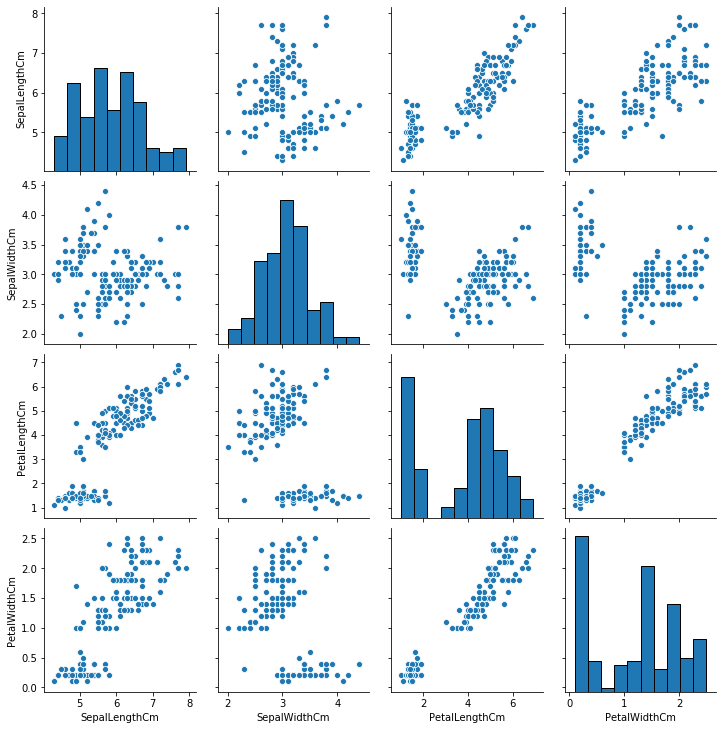

In [17]:
sns.pairplot(data=df_new,diag_kind='hist',diag_kws=dict(edgecolor='black'))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=df.drop('Species',axis=1)
y=df['Species']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree=DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
pred_1=dtree.predict(X_test)

In [26]:
dtree.score(X_test,y_test)

0.9777777777777777

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
print(confusion_matrix(y_test,pred_1))
print('\n')
print(classification_report(y_test,pred_1))

[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [29]:
from sklearn.tree import plot_tree

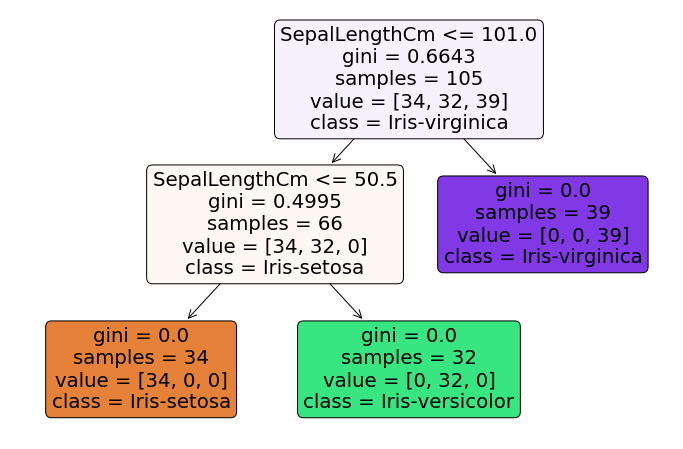

In [38]:
plt.figure(figsize=(12,8))
tree_figure=plot_tree(dtree,feature_names=df_new.columns,class_names=df_new['Species'].unique().tolist(),precision=4,
                      filled=True,rounded=True)